In [1]:
#Importing packages
import numpy as np
import pandas as pd
import seaborn as sb
#import category_encoders as ce
import matplotlib.pyplot as plt
import pylab as pl
from pandas import ExcelFile
import xlrd
from sklearn import preprocessing

%matplotlib inline

In [3]:
#Openning Excel sheet and importing the data
"""
Open files and create the data frame from the excel sheet.
there are 24 columns and 142193 observations.
"""
#Assign spreadsheet file name to 'file'.
file = 'WeatherAUS-Draft.xlsx'

#Load spreadsheet.
Excel_File = pd.ExcelFile (file)
print "The file name is :", file
print "The sheet's name is:", "Data"

#Load a sheet into a dataframe by name Data:
Data = Excel_File.parse('Data')
print "The matrix size is:", np.shape (Data)
print "The file has:", np.size (Data), "data points."
print "*******************************************"
#Exploratory data analysis
print Data.shape
Data.head()
print Data.info()
print "*******************************************"
Data.head()

The file name is : WeatherAUS-Draft.xlsx
The sheet's name is: Data
The matrix size is: (142193, 14)
The file has: 1990702 data points.
*******************************************
(142193, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 14 columns):
label    142193 non-null int64
P1       142193 non-null float64
P2       142193 non-null float64
P3       142193 non-null float64
P4       142193 non-null float64
P5       142193 non-null float64
P6       142193 non-null float64
P7       142193 non-null float64
P8       142193 non-null float64
P9       142193 non-null float64
P10      142193 non-null float64
P11      142193 non-null float64
P12      142193 non-null float64
P13      142193 non-null int64
dtypes: float64(12), int64(2)
memory usage: 15.2 MB
None
*******************************************


,label,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13
0,-1,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,-1
1,-1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,-1
2,-1,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,-1
3,-1,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,-1
4,-1,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,-1


     P1    P2   P3    P4    P5    P6    P7    P8      P9     P10   P11   P12  \
0  13.4  22.9  0.6  44.0  20.0  24.0  71.0  22.0  1007.7  1007.1  16.9  21.8   
1   7.4  25.1  0.0  44.0   4.0  22.0  44.0  25.0  1010.6  1007.8  17.2  24.3   
2  12.9  25.7  0.0  46.0  19.0  26.0  38.0  30.0  1007.6  1008.7  21.0  23.2   
3   9.2  28.0  0.0  24.0  11.0   9.0  45.0  16.0  1017.6  1012.8  18.1  26.5   
4  17.5  32.3  1.0  41.0   7.0  20.0  82.0  33.0  1010.8  1006.0  17.8  29.7   

   P13  
0   -1  
1   -1  
2   -1  
3   -1  
4   -1  
0   -1
1   -1
2   -1
3   -1
4   -1
Name: label, dtype: int64


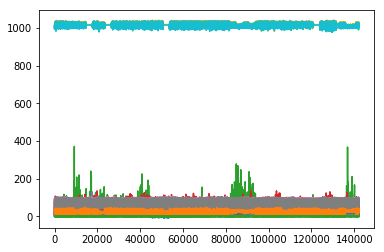

In [5]:
#Data
X = Data.drop('label', axis=1)  
y = Data['label']
print X.head()
print y.head()
#PLots
plt.plot(X) 
plt.show()

In [6]:
#Preprocessing: Scale
"""Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; 
they might behave badly if the individual features do not more or less look like standard normally distributed data:
Gaussian with zero mean and unit variance.
In practice we often ignore the shape of the distribution and just transform the data to center it by removing the mean
value of each feature, then scale it by dividing non-constant features by their standard deviation.
For instance, many elements used in the objective function of a learning algorithm (such as the RBF kernel of Support Vector
Machines or the l1 and l2 regularizers of linear models) assume that all features are centered around zero and have variance 
in the same order. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective
function and make the estimator unable to learn from other features correctly as expected.
The function scale provides a quick and easy way to perform this operation on a single array-like dataset:"""

from sklearn.preprocessing import StandardScaler

scaler = preprocessing.StandardScaler()
print scaler  
X_scaled = scaler.fit_transform(X)
#X_new_scaled= scaler.transform(X_new)

X_scaled = pd.DataFrame(X_scaled)
X_scaled.columns = ['MinTemp','MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm',
                            'Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm','RainToday']
X_scaled.head()

StandardScaler(copy=True, with_mean=True, with_std=True)


,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
0,0.189954,-0.045964,-0.207757,0.305648,0.677661,0.614850,0.113891,-1.435935,-1.475456,-1.220966,-0.013521,0.016412,-0.532962
1,-0.749174,0.263480,-0.278989,0.305648,-1.130034,0.385532,-1.312265,-1.289821,-1.045586,-1.116203,0.032832,0.380274,-0.532962
2,0.111694,0.347873,-0.278989,0.457874,0.564680,0.844167,-1.629188,-1.046299,-1.490279,-0.981508,0.619963,0.220175,-0.532962
3,-0.467436,0.671383,-0.278989,-1.216614,-0.339167,-1.105034,-1.259444,-1.728162,-0.007969,-0.367897,0.171889,0.700472,-0.532962
4,0.831692,1.276205,-0.160269,0.077309,-0.791091,0.156214,0.694918,-0.900186,-1.015940,-1.385593,0.125537,1.166215,-0.532962


In [7]:
#Divide data into training and test sets
from sklearn.model_selection import train_test_split

#P stands for Primary sets 
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_scaled, y, test_size = 0.20, random_state = 1) 

# Plot traning and test data
#plt.plot(X_train_p)
#plt.title('Australia Rain Data: training data')
#plt.savefig('Iris-Training data.png')
#plt.show()

#plt.plot(X_train, y_train, X_test, y_test) 
#plt.plot(X_test_p)
#plt.title('Australia Rain Data: test data')
#plt.savefig('Iris-Test data.png')
#plt.show()

In [8]:
X_train = X_train_p
X_test = X_test_p
y_train = y_train_p
y_test = y_test_p 

X_train = pd.DataFrame(X_train)
#Adding name for the columns
X_train.columns = ['MinTemp','MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am',
                   'Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm','RainToday']
X_train = X_train.reset_index()
X_train = X_train.drop('index', axis=1)                            
print X_train.shape
print "Training data"
print X_train.head()

X_test = pd.DataFrame(X_test)
X_test.columns = ['MinTemp','MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm',
                            'Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm','RainToday']
X_test = X_test.reset_index()
X_test = X_test.drop('index', axis=1)                             
print X_test.shape
print "Test data"
print X_test.head()

(113754, 13)
Training data
    MinTemp   MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
0 -0.670913 -0.256949 -0.255245      -0.379370     -1.581958      0.041555   
1  0.972562 -0.425736  3.567536       0.000000     -0.339167     -1.105034   
2  0.596910 -0.158489 -0.278989       0.000000      0.112756      1.646780   
3 -1.109173 -0.496064 -0.278989      -1.064388     -0.791091     -1.334352   
4  0.988214  1.726305 -0.278989      -0.227144     -0.791091     -0.417080   

   Humidity9am   Humidity3pm   Pressure9am   Pressure3pm   Temp9am  \
0     1.592868  1.226084e-01  1.029649e+00  1.293341e+00 -1.265038   
1     1.540047  2.070787e+00  1.702044e-12  2.245913e-12  0.310947   
2    -0.678418  4.635397e-01 -2.279177e-02 -2.032702e-01  0.542709   
3     1.381585 -1.696185e-01  1.702044e-12  2.245913e-12 -0.909669   
4    -0.150212 -3.460661e-16 -7.491239e-01 -9.515756e-01  1.469759   

        Temp3pm  RainToday  
0 -1.873501e-01  -0.532962  
1 -4.638848e-01   1.87630

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

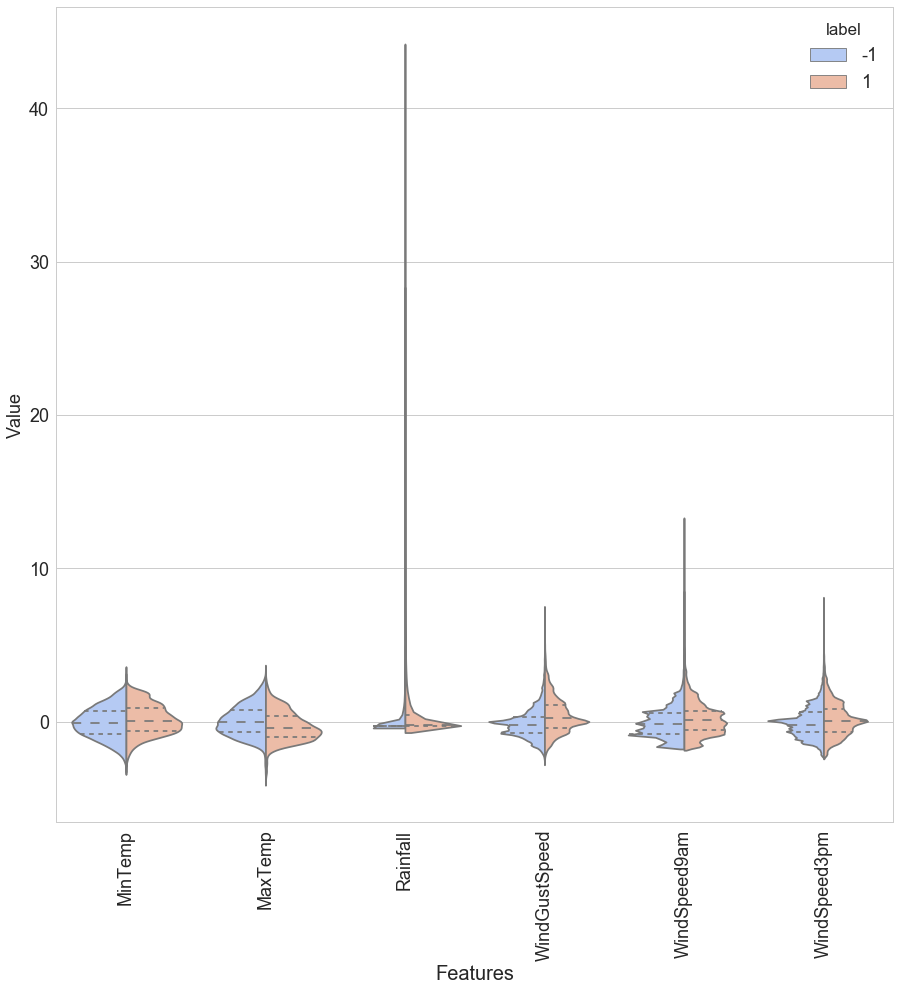

In [9]:
"""In order to visualizate data we are going to use seaborn plots that is not used in other
kernels to inform you and for diversity of plots. What I use in real life is mostly violin plot and swarm plot.
Before violin and swarm plot we need to normalization or standirdization.
Because differences between values of features are very high to observe on plot."""
#Part 1
#data = X
data_dia = y
data_n_2 = X_scaled
data = pd.concat([y,data_n_2.iloc[:,0:6]],axis=1)

sb.set(style="whitegrid",font='sans-serif', font_scale=1.8, color_codes=True)

data = pd.melt(data,id_vars="label",
                    var_name = 'Features',
                    value_name='Value')
plt.figure(figsize=(15,15))
plt.xlabel('Feature', fontsize=20)
plt.ylabel('Value', fontsize=18)
sb.violinplot(x= "Features", y="Value", hue="label", data=data, palette = "coolwarm", split=True, inner="quart")
plt.xticks(rotation=90)


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

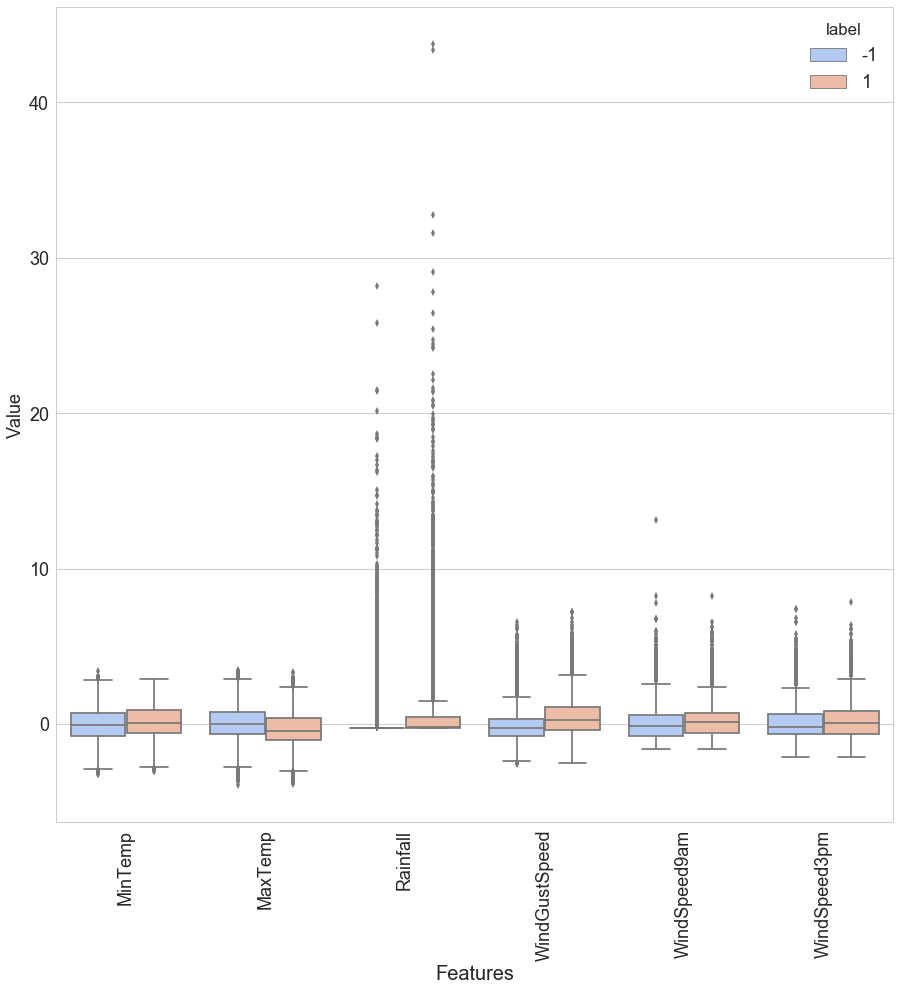

In [10]:
# As an alternative of violin plot, box plot can be used
# box plots are also useful in terms of seeing outliers
# I do not visualize all features with box plot
# In order to show you lets have an example of box plot
# If you want, you can visualize other features as well.
#Part 1
"""In order to visualizate data we are going to use seaborn plots that is not used in other
kernels to inform you and for diversity of plots. What I use in real life is mostly violin plot and swarm plot.
Before violin and swarm plot we need to normalization or standirdization.
Because differences between values of features are very high to observe on plot."""
#Part 1
sb.set(style="whitegrid",font='sans-serif', font_scale=1.8)
plt.figure(figsize=(15,15))
plt.xlabel('Feature', fontsize=20)
plt.ylabel('Value', fontsize=18)
sb.boxplot(x="Features", y="Value", hue="label", data=data, palette = "coolwarm")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

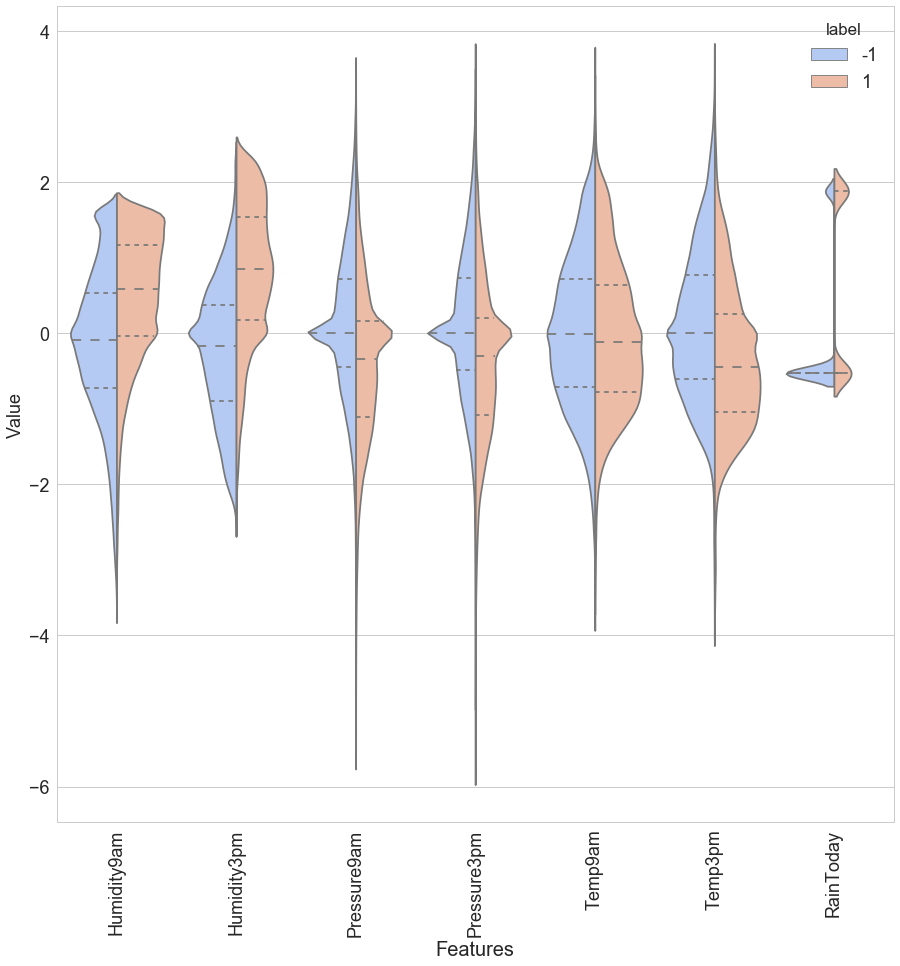

In [10]:
#Part 2
data = pd.concat([y,data_n_2.iloc[:,6:13]],axis=1)

sb.set(style="whitegrid")
data = pd.melt(data,id_vars="label",
                    var_name = 'Features',
                    value_name='Value')
sb.set(style="whitegrid",font='sans-serif', font_scale=1.8)
plt.figure(figsize=(15,15))
plt.xlabel('feature', fontsize=20)
plt.ylabel('value', fontsize=18)
sb.violinplot(x= "Features", y="Value", hue="label", data=data, palette = "coolwarm", split=True, inner="quart")
plt.xticks(rotation=90)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

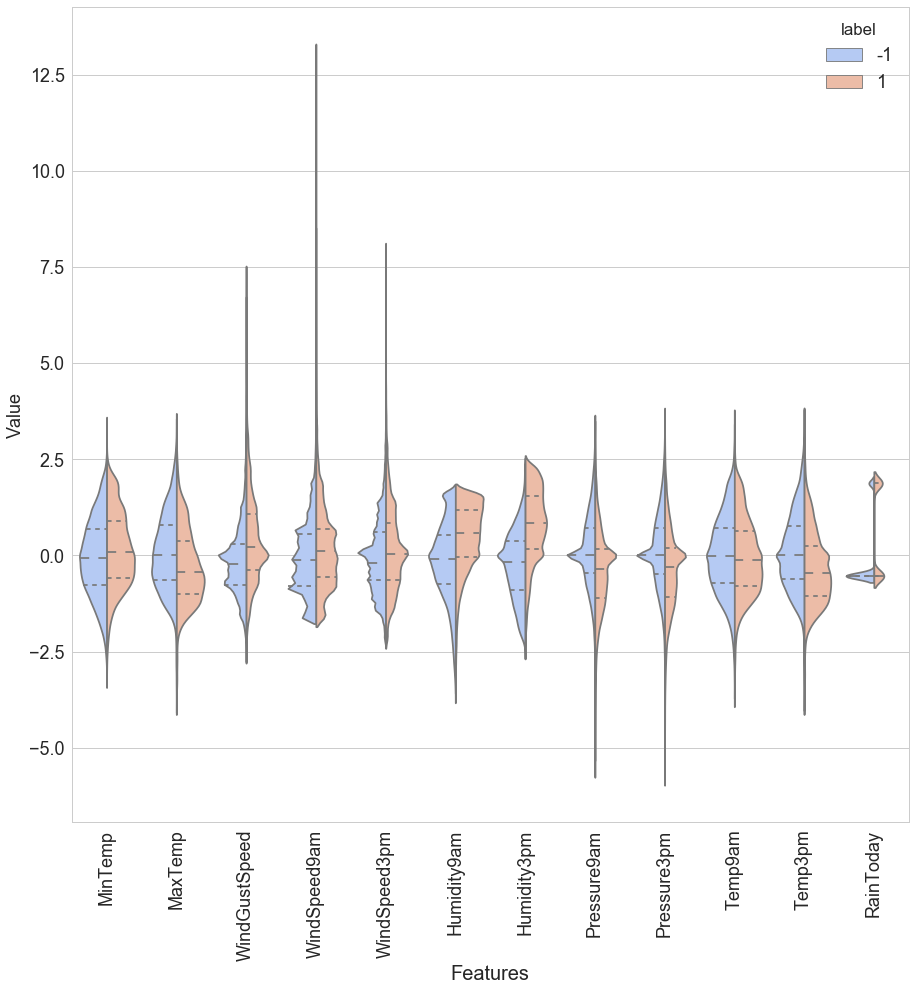

In [12]:
XX = X_scaled.drop('Rainfall', axis = 1)
data_dia = y
data_n_2 = XX

sb.set(style="whitegrid",font='sans-serif', font_scale=1.8, color_codes=True)

data = pd.concat([y,data_n_2.iloc[:,0:12]],axis=1)

sb.set(style="whitegrid")
data = pd.melt(data,id_vars="label",
                    var_name = 'Features',
                    value_name='Value')
sb.set(style="whitegrid",font='sans-serif', font_scale=1.8)
plt.figure(figsize=(15,15))
plt.xlabel('feature', fontsize=20)
plt.ylabel('value', fontsize=18)
sb.violinplot(x= "Features", y="Value", hue="label", data=data, palette = "coolwarm", split=True, inner="quart")
plt.xticks(rotation=90)

In [ ]:
# As an alternative of violin plot, box plot can be used
# box plots are also useful in terms of seeing outliers
# I do not visualize all features with box plot
# In order to show you lets have an example of box plot
# If you want, you can visualize other features as well.
#Part 2
sb.set(style="whitegrid",font='sans-serif', font_scale=1.8)
plt.figure(figsize=(15,15))
plt.xlabel('Feature', fontsize=20)
plt.ylabel('Value', fontsize=18)

sb.boxplot(x="Features", y="Value", hue="label", data=data, palette = "coolwarm")
plt.xticks(rotation=90)

In [ ]:
#Correlation map of the original data scaled
sb.set(style="whitegrid",font='sans-serif', font_scale=1.3)
plt.figure(figsize=(15, 15))
plt.title('Correlation Matrix')
plot = sb.heatmap(X_scaled.corr(), annot=True,cmap= 'coolwarm')